In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('../Data/train.csv')
print(df.head())
df.shape

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

(42000, 785)

In [3]:
df.iloc[:1,:]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
(df.iloc[:1 , 1:])

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label
9,3


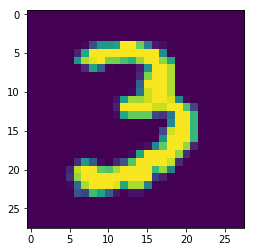

In [5]:
plt.imshow(np.array(df.iloc[9:10 , 1:]).reshape(28,28))
df.iloc[9:10,0:1]

In [6]:
dataset = pd.read_csv('../Data/train.csv')
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = dataset.iloc[:,1:].values
Y= (dataset.iloc[:,:1].values).flatten()
print(Y[0:5])

[1 0 1 4 0]


In [8]:
# divide training set provided to validate results
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size=0.20,test_size=0.10,random_state=0)


In [9]:
Y_test[0:5]

array([3, 6, 9, 5, 6])

In [10]:
#create classifier for KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [11]:
#fit model
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
Y_pred = classifier.predict(X_test)

In [25]:
cnt = 0
for i in range(0,len(Y_pred)):
    if(Y_test[i] !=Y_pred[i]):
        cnt +=1
print('accuracy =',(len(Y_pred)-cnt)/len(Y_pred))

accuracy = 0.9442857142857143


In [14]:
# provided test data 
test_dataset = pd.read_csv('../Data/test.csv')
test_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
given_x_test = test_dataset.iloc[:1000,:]

In [27]:
expected_y_pred = classifier.predict(given_x_test)
expected_y_pred[0:5]

array([2, 0, 9, 9, 3])

In [35]:
ImageIdList = list(range(1,1001))
PredictedNumberList = expected_y_pred
my_dict = {'ImageId':ImageIdList,'Label':PredictedNumberList}
output_df = pd.DataFrame(my_dict)
output_df.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
